In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Import the data set


In [ ]:
#import the dataset we have saved in the current directory
url = "iris.data"
data = np.genfromtxt(url, delimiter=',', dtype='float', usecols=(0, 1, 2, 3))


## Standardize and Normalize the data

- **Mean normalization:** Centers the dataset around zero by subtracting the mean of each feature, removing bias.
- **Standardization:** Scales each feature to have a mean of 0 and standard deviation of 1, ensuring similar scales.
- **Prevent numerical instability:** Improves stability of optimization algorithms, leading to faster convergence.
- **Enhance interpretability:** Makes model coefficients more interpretable for comparing feature importance.



In [16]:
class StandardScaler:
    def fit_transform(self, X):
        self.means = np.mean(X, axis=0)
        self.stds = np.std(X, axis=0)
        return (X - self.means) / self.stds

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Calculate Covariance Matrix and Eigenvectors

- **Covariance Matrix:** Calculated using the formula:
  $$ \text{covariance}(\mathbf{X}) = \frac{1}{N} (\mathbf{X} - \mathbf{\bar{X}})^T (\mathbf{X} - \mathbf{\bar{X}}) $$
  Where:
  - $\mathbf{X}$ is the data matrix (after standardization),
  - $\mathbf{\bar{X}}$ is the mean vector of the data matrix,
  - $N$ is the number of samples.

- **Eigenvalues and Eigenvectors:** Obtained by performing eigendecomposition on the covariance matrix:
  $$ \mathbf{C} = \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^{-1} $$
  Where:
  - $\mathbf{C}$ is the covariance matrix,
  - $\mathbf{Q}$ is the matrix of eigenvectors,
  - $\mathbf{\Lambda}$ is a diagonal matrix of eigenvalues.


In [38]:
cov_matrix = np.cov(data_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
#the eigenvalues are ordered and the corresponding eigenvectors are ordered accorningly

## Calculate Explained Variance Ratio

- **Total Variance:** Sum of all eigenvalues obtained from the eigendecomposition of the covariance matrix:
  $$ \text{Total Variance} = \sum_{i=1}^{n} \lambda_i $$
  Where $\lambda_i$ represents the $i$-th eigenvalue.

- **Explained Variance Ratio:** Ratio of each individual eigenvalue to the total variance:
  $$ \text{Explained Variance Ratio} = \frac{\lambda_i}{\text{Total Variance}} $$
  Where $\lambda_i$ represents the $i$-th eigenvalue.

- **Cumulative Explained Variance Ratio:** Cumulative sum of explained variance ratios:
  $$ \text{Cumulative Explained Variance Ratio} = \sum_{i=1}^{n} \text{Explained Variance Ratio}_i $$
  Starting from the first principal component ($i=1$) up to the $n$-th principal component.


In [39]:
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

## Select Principal Components

- **Threshold Selection:** Choose a threshold to determine the amount of variance to retain.

- **Determine Number of Components:** Find the number of principal components needed to exceed the chosen threshold of cumulative explained 
- **Selection of Principal Components:** Select the principal components corresponding to the determined number

- **Projection of Data:** Project the standardized data onto the selected principal components to obtain the reduced-dimensional 

In [19]:
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1
principal_components = eigenvectors[:, :num_components]
data_projected = data_scaled.dot(principal_components)


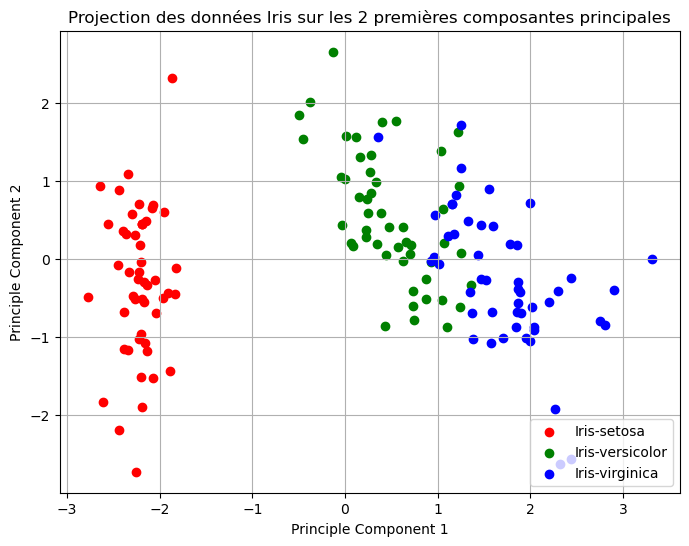

In [44]:
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    plt.scatter(x=data_projected[i * 50:(i + 1) * 50, 0], 
                y=data_projected[i * 50:(i + 1) * 50, 1], 
                color=colors[i],
                label=class_labels[i])
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('Projection of the Dataset onto the 2 Principle components')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


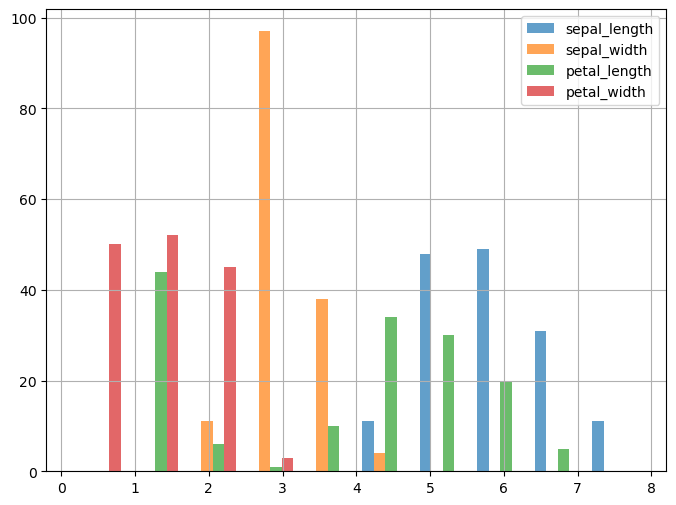

In [50]:
#histogram plot for each attribute in the orinal data
#bins specify the number of intervals to split the data 
plt.figure(figsize=(8, 6))
plt.hist(data, bins=10, alpha=0.7, label=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
